# **Mempersiapkan Dataset Burung**

In [1]:
from google.colab import drive
import os

drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
base_dir = '/content/drive/My Drive/DATASET BURUNG/'
!ls "/content/drive/My Drive/DATASET BURUNG/"

train_ds="/content/drive/My Drive/DATASET BURUNG/latih"
validation_ds="/content/drive/My Drive/DATASET BURUNG/validasi"
test_ds="/content/drive/My Drive/DATASET BURUNG/uji"

latih  uji  validasi


# **Import Library**

In [3]:
import keras, os

from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D
from keras.layers import Flatten, Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# **Pre-processing Dataset**

In [4]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    zoom_range = 0.2,
    width_shift_range = 0.2,
    height_shift_range = 0.2)

val_datagen = ImageDataGenerator(rescale = 1./255)

test_datagen = ImageDataGenerator(rescale = 1./255)

**Target Size Citra**

In [59]:
train_generator = train_datagen.flow_from_directory(
    train_ds,
    target_size = (150, 150),
    batch_size = 16,
    shuffle = True,
    class_mode = 'categorical')

val_generator = val_datagen.flow_from_directory(
    validation_ds,
    target_size = (150, 150),
    batch_size = 16,
    shuffle = False,
    class_mode = 'categorical')

test_generator = test_datagen.flow_from_directory(
    test_ds,
    target_size = (150, 150),
    batch_size = 16,
    shuffle = False,
    class_mode = 'categorical')

Found 3450 images belonging to 23 classes.
Found 115 images belonging to 23 classes.
Found 115 images belonging to 23 classes.


In [60]:
img = train_generator[0]
print(img[0].shape) # bentuk kumpulan masukan
print(img[1].shape) # bentuk label target

(16, 150, 150, 3)
(16, 23)


In [61]:
#  ITERASI
print(len(train_generator)) # jml data train/batch size

216


**Visualisasi Dataset**



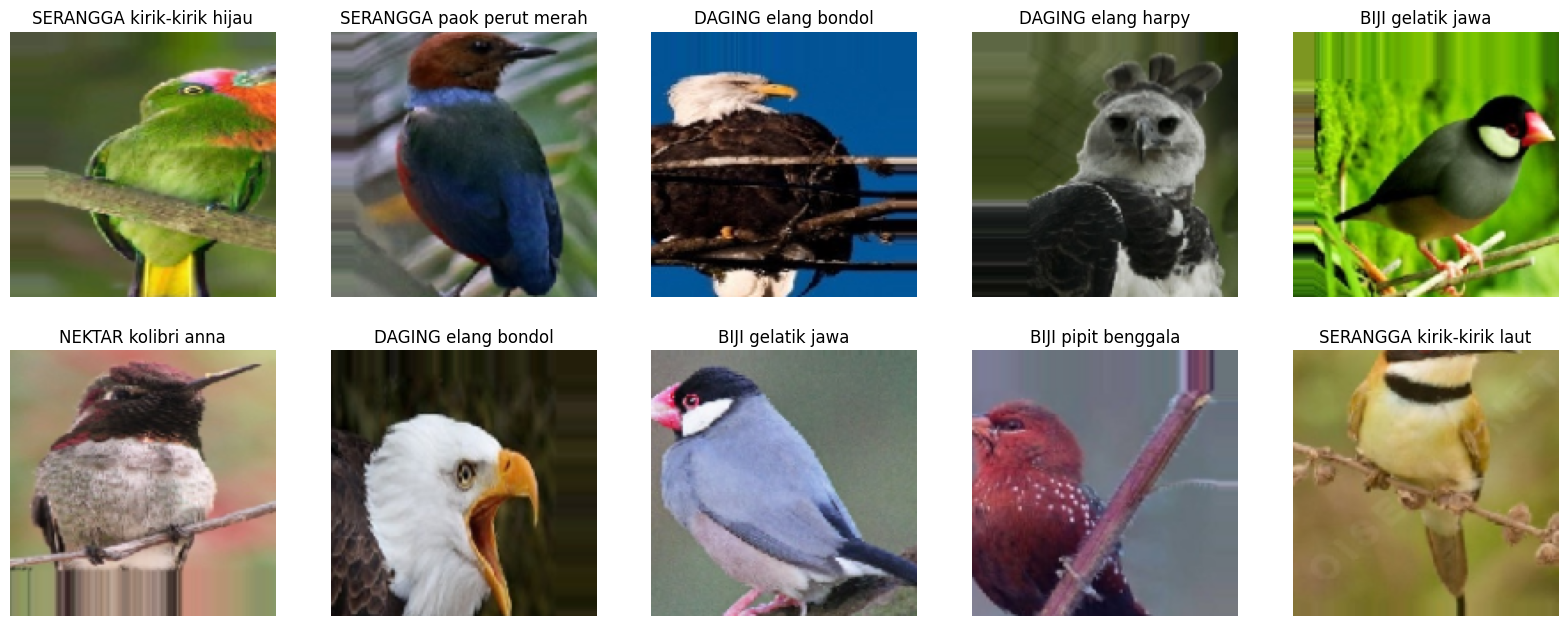

In [62]:
labels = [k for k in train_generator.class_indices]
sample_generate = train_generator.__next__()

images = sample_generate[0]
titles = sample_generate[1]
plt.figure(figsize = (20 , 20))

for i in range(10):
    plt.subplot (5, 5, i+1)
    plt.imshow(images[i])
    plt.title(labels[np.argmax(titles[i],axis=0)])
    plt.axis("off")

# **Setting Model VGG 16**

In [94]:
model = Sequential()

model.add(Conv2D(filters=64,kernel_size=3,strides=1,padding="same",input_shape=(150,150,3),activation="relu"))
model.add(Conv2D(filters=64,kernel_size=3,strides=1,padding="same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=2))

model.add(Conv2D(filters=128,kernel_size=3,strides=1,padding="same",activation="relu"))
model.add(Conv2D(filters=128,kernel_size=3,strides=1,padding="same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=2))

model.add(Conv2D(filters=256,kernel_size=3,strides=1,padding="same",activation="relu"))
model.add(Conv2D(filters=256,kernel_size=3,strides=1,padding="same",activation="relu"))
model.add(Conv2D(filters=256,kernel_size=3,strides=1,padding="same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=2))

model.add(Conv2D(filters=512,kernel_size=3,strides=1,padding="same",activation="relu"))
model.add(Conv2D(filters=512,kernel_size=3,strides=1,padding="same",activation="relu"))
model.add(Conv2D(filters=512,kernel_size=3,strides=1,padding="same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=2))

model.add(Conv2D(filters=512,kernel_size=3,strides=1,padding="same",activation="relu"))
model.add(Conv2D(filters=512,kernel_size=3,strides=1,padding="same",activation="relu"))
model.add(Conv2D(filters=512,kernel_size=3,strides=1,padding="same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=2))

# FLATTEN
model.add(Flatten())
model.add(Dense(4096, activation="relu"))
model.add(Dense(4096, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(23, activation="softmax"))

# OPTIMIZER
opt = Adam(learning_rate = 0.00001)
model.compile(optimizer = opt,
              loss = keras.losses.categorical_crossentropy,
              metrics = ['accuracy']
)


In [95]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_91 (Conv2D)          (None, 150, 150, 64)      1792      
                                                                 
 conv2d_92 (Conv2D)          (None, 150, 150, 64)      36928     
                                                                 
 max_pooling2d_35 (MaxPoolin  (None, 75, 75, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_93 (Conv2D)          (None, 75, 75, 128)       73856     
                                                                 
 conv2d_94 (Conv2D)          (None, 75, 75, 128)       147584    
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 37, 37, 128)      0         
 g2D)                                                 

# **TRAINING & VALIDATION**

Model yang sudah di setting menggunakan data latih, kemudian di uji akurasinya menggunakan data validasi

In [96]:
history = model.fit(
    train_generator,
    validation_data = val_generator,
    verbose = 1,
    epochs = 70
)

Epoch 1/70
216/216 [==============================] - 37s 164ms/step - loss: 3.1326 - accuracy: 0.0501 - val_loss: 3.0660 - val_accuracy: 0.0870
Epoch 2/70
216/216 [==============================] - 37s 171ms/step - loss: 2.8488 - accuracy: 0.1223 - val_loss: 2.6544 - val_accuracy: 0.1652
Epoch 3/70
216/216 [==============================] - 38s 177ms/step - loss: 2.6689 - accuracy: 0.1667 - val_loss: 2.4960 - val_accuracy: 0.1652
Epoch 4/70
216/216 [==============================] - 38s 175ms/step - loss: 2.5525 - accuracy: 0.1890 - val_loss: 2.4301 - val_accuracy: 0.2000
Epoch 5/70
216/216 [==============================] - 37s 169ms/step - loss: 2.4558 - accuracy: 0.2391 - val_loss: 2.3378 - val_accuracy: 0.2696
Epoch 6/70
216/216 [==============================] - 37s 171ms/step - loss: 2.2994 - accuracy: 0.2765 - val_loss: 2.0603 - val_accuracy: 0.3217
Epoch 7/70
216/216 [==============================] - 37s 173ms/step - loss: 2.1924 - accuracy: 0.3067 - val_loss: 1.9235 - val_ac

# **Tabel Akurasi dan Loss**

In [97]:
results = pd.DataFrame(history.history)
# results.head(5)
# results.tail(5)
results


,loss,accuracy,val_loss,val_accuracy
0,3.132597,0.050145,3.066028,0.086957
1,2.848810,0.122319,2.654398,0.165217
2,2.668912,0.166667,2.495978,0.165217
3,2.552543,0.188986,2.430112,0.200000
4,2.455833,0.239130,2.337787,0.269565
...,...,...,...,...
65,0.196018,0.936522,0.568938,0.878261
66,0.192235,0.938841,0.529275,0.869565
67,0.174772,0.938841,0.663346,0.843478
68,0.181571,0.939420,0.832512,0.826087


In [98]:
print('Akurasi Training   : ', round(max(history.history['accuracy']) * 100),'%')
print('Akurasi Validation : ', round(max(history.history['val_accuracy']) * 100),'%')

Akurasi Training   :  95 %
Akurasi Validation :  90 %


# **Grafik Akurasi dan Loss**

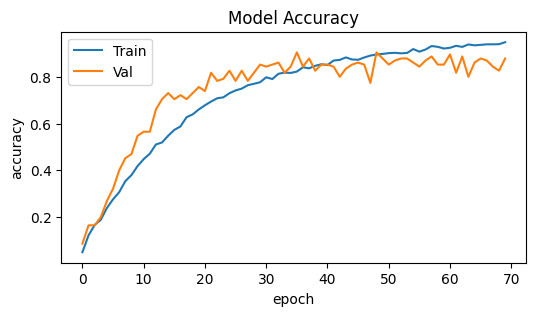

In [99]:
plt.figure(figsize=(6,3))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc='best')
plt.show()

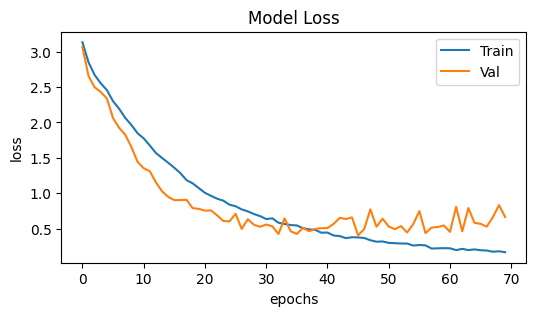

In [100]:
plt.figure(figsize=(6,3))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['Train','Val'], loc= 'best')
plt.show()

# **Testing**

In [101]:
y_test_1 = test_generator.classes
y_pred_1 = model.predict(test_generator)
y_pred_1 = np.argmax(y_pred_1,axis=1)

8/8 [==============================] - 0s 40ms/step


In [102]:
results = model.evaluate(test_generator)

8/8 [==============================] - 0s 45ms/step - loss: 0.4449 - accuracy: 0.9043


# **Interpretasi Hasil**

In [104]:
target_names = ['BIJI gelatik jawa','BIJI kardinal merah','BIJI pipit benggala','BIJI pipit gereja',
                'BUAH kasuari','BUAH kepodang emas','BUAH walik jambu',
                'DAGING alap-alap amerika','DAGING alap-alap kawah','DAGING elang bondol',
                'DAGING elang ekor merah','DAGING elang harpy','DAGING hering kalkun','DAGING hering raja',
                'NEKTAR kolibri anna','NEKTAR kolibri berleher rubi','NEKTAR kolibri sepah raja',
                'SERANGGA kirik-kirik hijau','SERANGGA kirik-kirik laut','SERANGGA paok hijau',
                'SERANGGA paok pancawarna','SERANGGA paok perut merah','SERANGGA pleci']


**Klasifikasi Report**

In [105]:
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Klasifikasi Report
print(classification_report(y_test_1, y_pred_1, target_names=target_names))


                              precision    recall  f1-score   support

           BIJI gelatik jawa       0.83      1.00      0.91         5
         BIJI kardinal merah       0.80      0.80      0.80         5
         BIJI pipit benggala       1.00      1.00      1.00         5
           BIJI pipit gereja       1.00      1.00      1.00         5
                BUAH kasuari       1.00      0.80      0.89         5
          BUAH kepodang emas       0.71      1.00      0.83         5
            BUAH walik jambu       1.00      1.00      1.00         5
    DAGING alap-alap amerika       0.83      1.00      0.91         5
      DAGING alap-alap kawah       0.83      1.00      0.91         5
         DAGING elang bondol       0.80      0.80      0.80         5
     DAGING elang ekor merah       1.00      0.80      0.89         5
          DAGING elang harpy       1.00      0.80      0.89         5
        DAGING hering kalkun       0.80      0.80      0.80         5
          DAGING he

**Confusion Matrix**

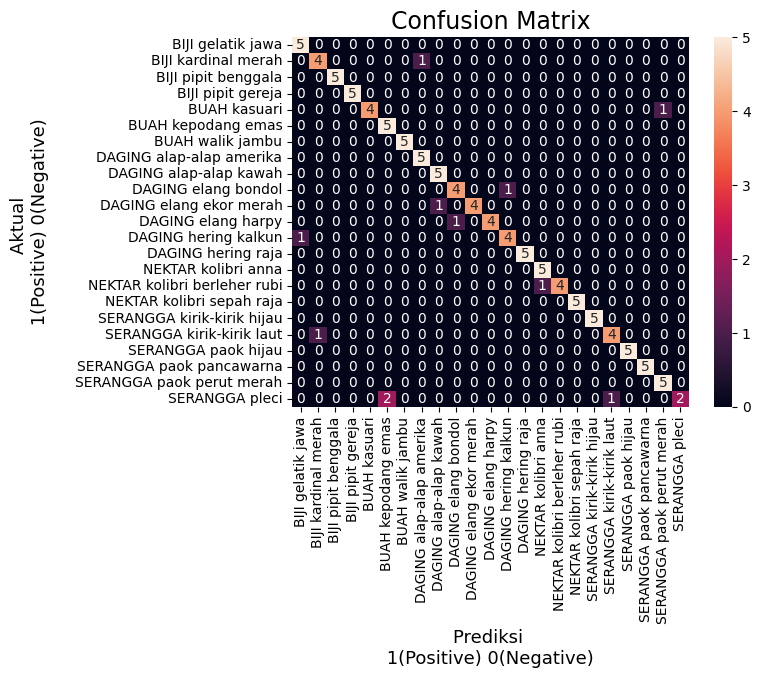


Accuracy   : 0.9043478260869565


In [106]:
cm = confusion_matrix(y_test_1,y_pred_1)
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels = target_names,
            yticklabels = target_names)
plt.ylabel('Aktual \n 1(Positive) 0(Negative) \n',fontsize=13)
plt.xlabel('Prediksi \n 1(Positive) 0(Negative) \n',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

# PRINT AKURASI
accuracy = accuracy_score(y_test_1, y_pred_1)
print("\nAccuracy   :", accuracy)


# **Coba Klasifikasi**

**Pilih Folder Untuk di Klasifikasi**

In [154]:
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt

image_directory = '/content/drive/My Drive/DATASET BURUNG/uji/BIJI gelatik jawa'

images = []
for filename in os.listdir(image_directory):
    path = os.path.join(image_directory, filename)
    img = Image.open(path)
    img = img.resize((150, 150))
    images.append(img)

images = np.array([np.array(img) for img in images])
images = images / 255.0

**Hasil Prediksi**

1/1 [==============================] - 0s 22ms/step

Prediksi kelas : BIJI gelatik jawa
Probabiliti Kelas: 1.0

Prediksi kelas : BIJI gelatik jawa
Probabiliti Kelas: 0.9999999

Prediksi kelas : BIJI gelatik jawa
Probabiliti Kelas: 1.0

Prediksi kelas : BIJI gelatik jawa
Probabiliti Kelas: 0.99994373

Prediksi kelas : BIJI gelatik jawa
Probabiliti Kelas: 0.9998053


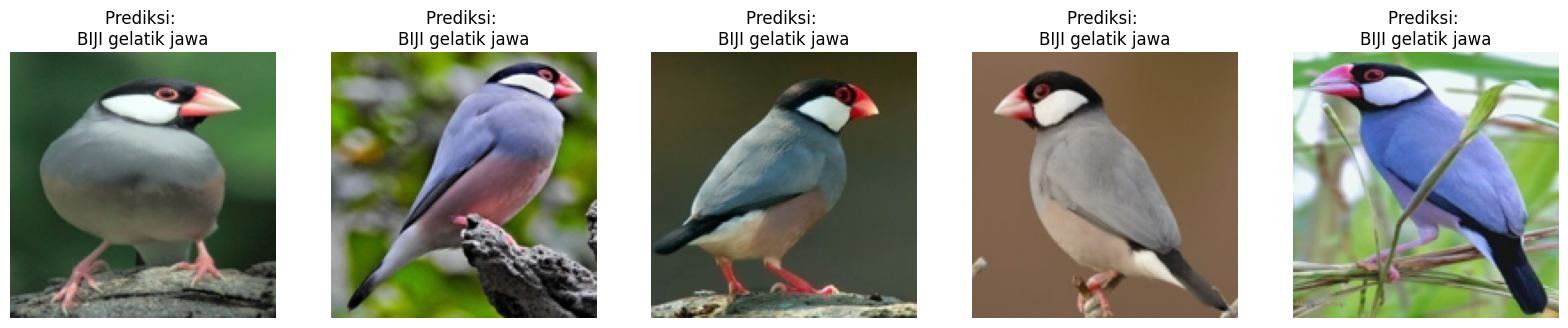

In [155]:
predictions = model.predict(images)

for i in range(len(images)):
    predicted_class = np.argmax(predictions[i])
    class_probability = predictions[i, predicted_class]
    print(f'\nPrediksi kelas : {labels[predicted_class]}')
    print('Probabiliti Kelas:', class_probability)

plt.figure(figsize = (20,20))
for i in range(5):
    predicted_class = np.argmax(predictions[i])
    plt.subplot (5, 5, i+1)
    plt.imshow(images[i])
    plt.axis("off")
    plt.title('Prediksi: \n'+ labels[predicted_class])